In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# df.YearsWithCurrManager.unique()

- Attrition: binary
- BusinessTravel: binary
- Department: categorical
- Education: categorical (numerical 변수로 처리되어있음)
- EducationField: categorical
- EnvironmentSatisfaction: categorical (numerical)
- Gender: categorical
- JobInvolvement: categorical (numerical)
- JobLevel: categorical (numerical)
- JobRole: categorical
- JobSatisfaction: categorical (numerical)
- MaritalStatus: categorical
- Over18: categorical
- OverTime: binary
- PerformanceRating: categorical (numerical)
- RelationshipSatisfaction: categorical (numerical)
- StockOptionLevel: categorical (numerical)
- WorkLifeBalance: categorical (numerical)
- 나머지는 이산형
- 범주형(binary, numerical 처리 포함) feature 18개

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 1. 결측치 및 이상치

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- 결측치 없음

In [8]:
discrete = df.select_dtypes(exclude = ['object']).columns
print(discrete)
print(len(discrete))

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
26


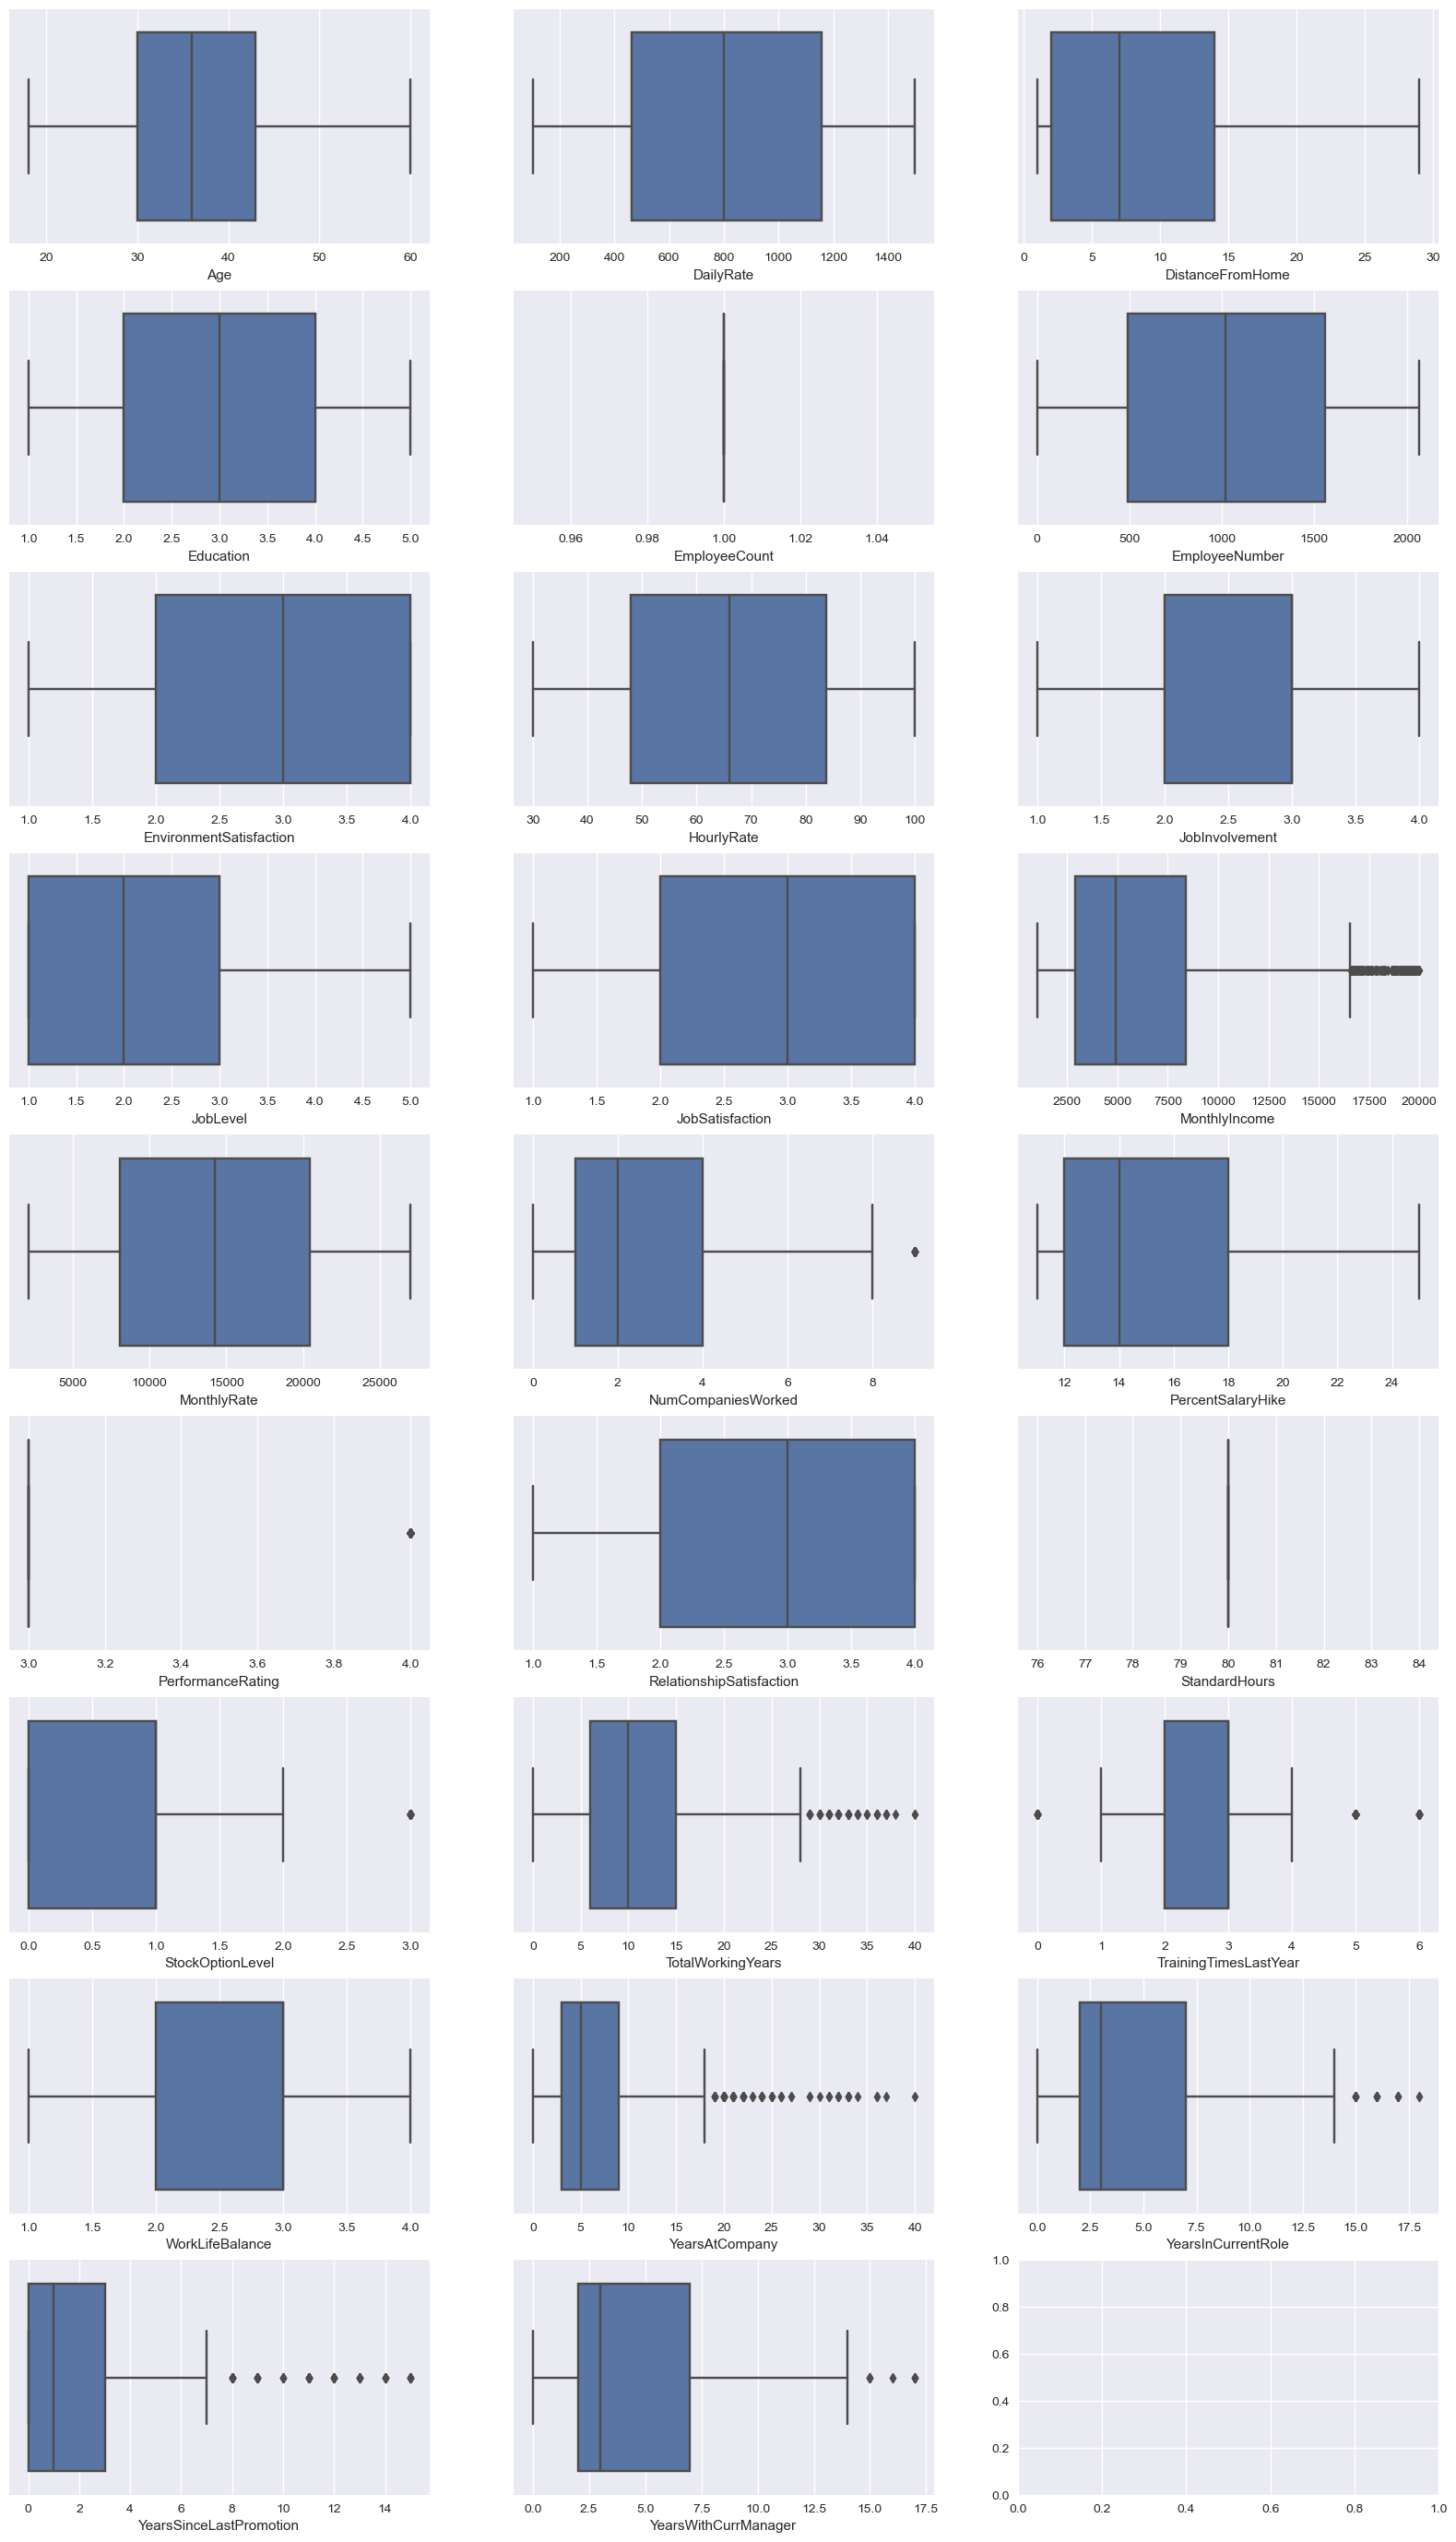

In [40]:
fig, ax = plt.subplots(ncols=3, nrows=9, figsize=(20,35))
for i, col in enumerate(discrete):
    sns.boxplot(data=df.loc[:, discrete], x=col, ax=ax[int(i/3),int(i%3)])

- MonthlyIncome, NumCompaniesWorked, TotalWorkingYears 등의 feature에 이상치가 존재하나 정말로 문제가 있는 데이터인지 그저 대부분의 데이터와 다른 데이터일 뿐인지 알 수 없음. 이상치 값을 보았을 때 아마도 후자일 가능성이 높을 것 같음.

# 2. 시각화

### 1) Histogram for Discrete Features

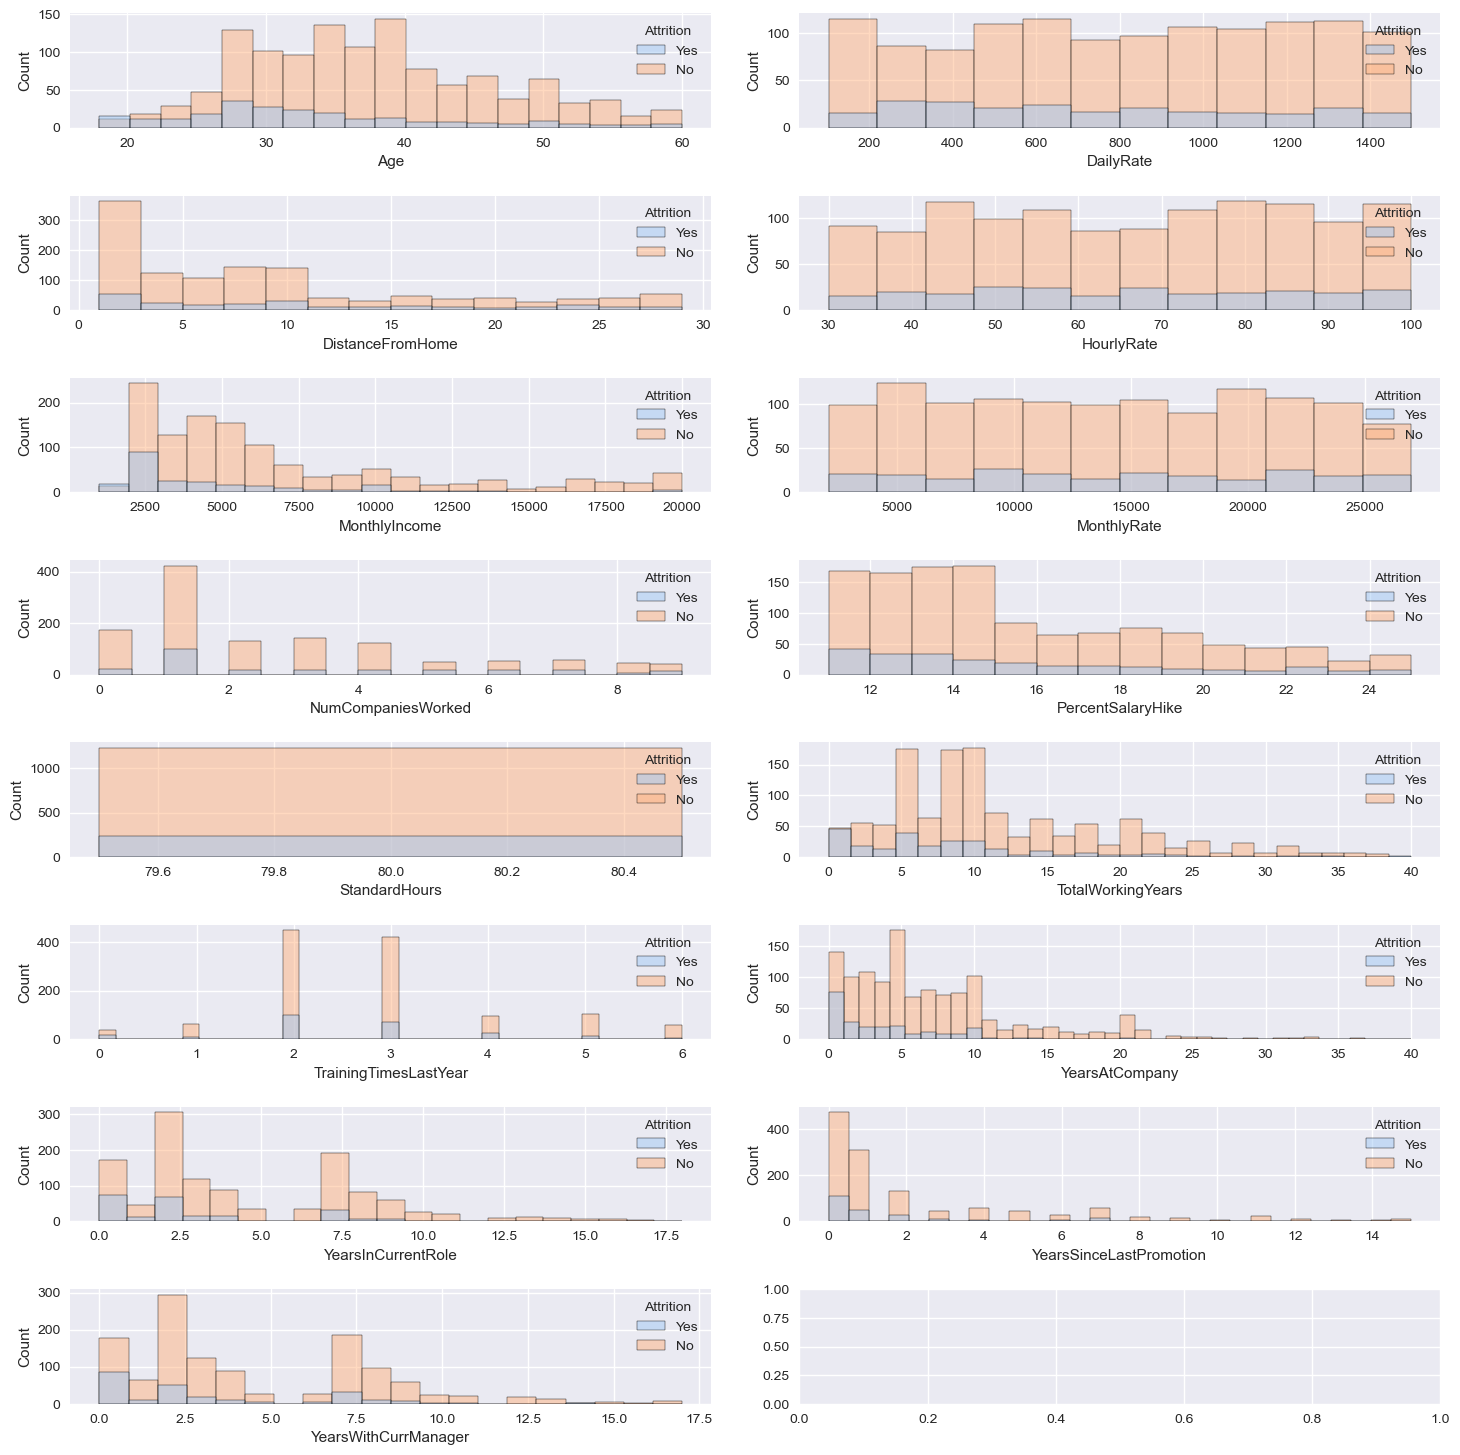

In [12]:
discrete_features = discrete.drop(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                               'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
                                  'EmployeeCount', 'EmployeeNumber'])
fig, ax = plt.subplots(ncols=2, nrows=8, figsize=(15, 15))
plt.tight_layout(pad=3)

for i, col in enumerate(discrete_features):
    sns.histplot(data=df, hue='Attrition', palette='pastel', x=col, ax=ax[int(i/2),int(i%2)])

- Age: 20대 중반에서 40대 초중반까지의 사람들이 주를 이루고 있음.
- TotalWorkingYears, YearsAtCompany: 이 기업은 일한지 약 5년 또는 약 7-11년 경력인 사람들이 주로 있음. 이 기업에서 근무한지는 10년 이하인 사람들이 대부분임. 개중에서도 5년 이하 근무한 사람이 많음. 장기근속하는 사람의 비율은 높지 않음. Age 변수와 함께 생각했을 때 안정적인 직장은 아닌 것 같음 
- MonthlyIncome: 대부분 월 소득이 7500달러 이하임. 퇴사자 중에는 월 소득 2000-3000달러 사이인 사람이 압도적으로 많음.
- DailyRate, HourlyRate, MonthlyRate는 퇴사한 그룹이나 퇴사 안 한 그룹이나 구간별로 큰 비율 차이는 없음. 

### 2) Countplot for Categorical Features

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
categorical = df.drop(discrete_features, axis=1).drop(['Attrition', 'EmployeeCount', 'EmployeeNumber'], axis=1).columns
categorical

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')

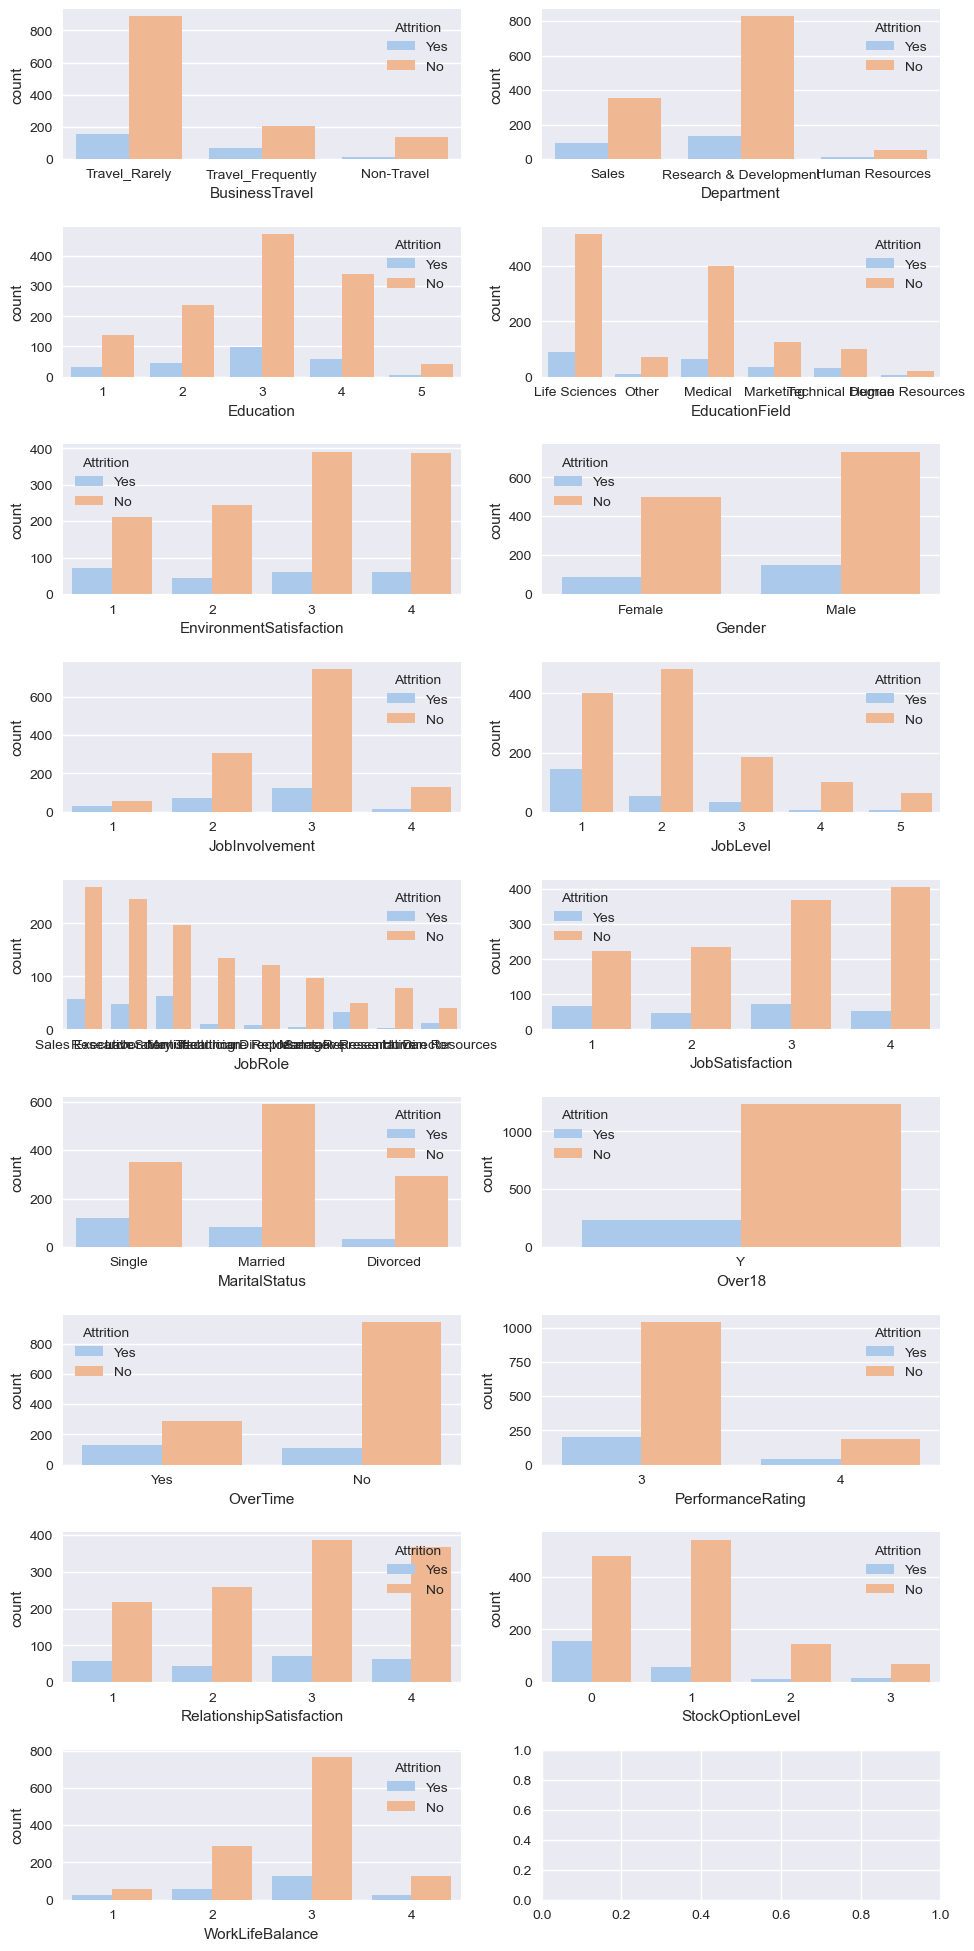

In [52]:
fig, axes = plt.subplots(ncols=2, nrows=9, figsize=(10, 20))
plt.tight_layout(pad=3)

for i, col in enumerate(categorical):
    sns.countplot(data=df, hue='Attrition', palette='pastel', x=col, ax=axes[int(i/2),int(i%2)])

- EnvironmentSatisfaction: 퇴사하지 않은 그룹의 경우 만족도가 3, 4인 사람들의 수가 만족도가 1, 2로 상대적으로 낮은 사람들의 수보다 1.5배 이상 많았다. 반면 퇴사한 그룹의 경우 만족도 값마다 비율이 비슷하다. (JobSatisfaction, RelationshipSatisfaction 변수에서도 비슷한 양상을 보임.)    


- Joblevel: 퇴사하지 않은 사람 수 대비 퇴사자의 수가 가장 많은 그룹은 업무 수준이 1로 가장 낮은 그룹이다. (StockOptionLevel 변수에서도 비슷한 양상이 나타남) 업무 수준이 낮으므로 회사에 남아야 하는 부담이 적거나, 능력 향상 의지 등의 사유로 퇴사를 고민하는 경우가 더 많을 것으로 유추해볼 수 있음.  


- MaritalStatus: 퇴사하지 않은 사람의 경우 기혼자 그룹의 비율이 타 그룹(미혼, 이혼)의 비율보다 2배 가량 높았으나 퇴사자의 경우 미혼의 비율이 가장 높았다. 기혼자의 경우 가족 부양의 의무, 혼자 결정하기보다 가족과 의논해야 함 등의 이유로 퇴사하는 일이 상대적으로 적은 것으로 유추해볼 수 있다.   


- OverTime: 퇴사한 사람들의 경우 두 범주의 비율이 비슷한 것과 달리, 퇴사하지 않은 사람들의 경우 규정 외 시간에 노동을 한 사람보다 규정 외 시간에 노동하지 않은 사람이 약 3배 가량 많다. 근무 시간의 관점에서 봤을 때 업무 환경이 상대적으로 만족스럽기 때문에 퇴사에 대해 덜 생각하는 것일 수 있다.

### 3) Department와 MonthlyIncome의 Side-by-Side Boxplot

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

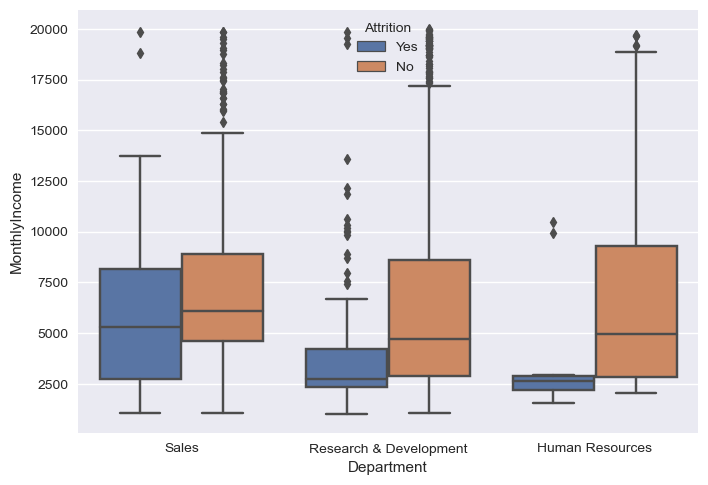

In [61]:
sns.boxplot(x="Department", y="MonthlyIncome", hue="Attrition", palette='deep', data=df)

- R&D 부서의 경우 퇴사한 그룹에 비해 퇴사하지 않은 그룹의 월 소득의 분산이 훨씬 크게 나타남. Sales 부서의 경우 반대 양상이 나타남. 
- Human Resources 부서의 경우 퇴사한 그룹의 소득이 퇴사하지 않은 그룹의 소득에 비해 훨씬 적음. 퇴사한 그룹의 월 소득 최댓값이 퇴사하지 않은 그룹의 1분위수와 비슷하며 퇴사자 모두가 비슷하게 적은 소득을 얻었음(분산이 상대적으로 매우 작음).
- 모든 부서에서 공통적으로 퇴사한 그룹의 소득의 분포가 퇴사하지 않은 그룹의 소득의 분포보다 값이 작은 쪽에 위치해있음. 이 그래프만 봤을 때는 소득에 대한 불만족을 퇴사의 한 가지 원인으로 볼 수 있음

In [59]:
df.groupby('Department')['Attrition'].value_counts()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

### 4) Job Role과 MonthlyIncome의 Side-by-Side Boxplot

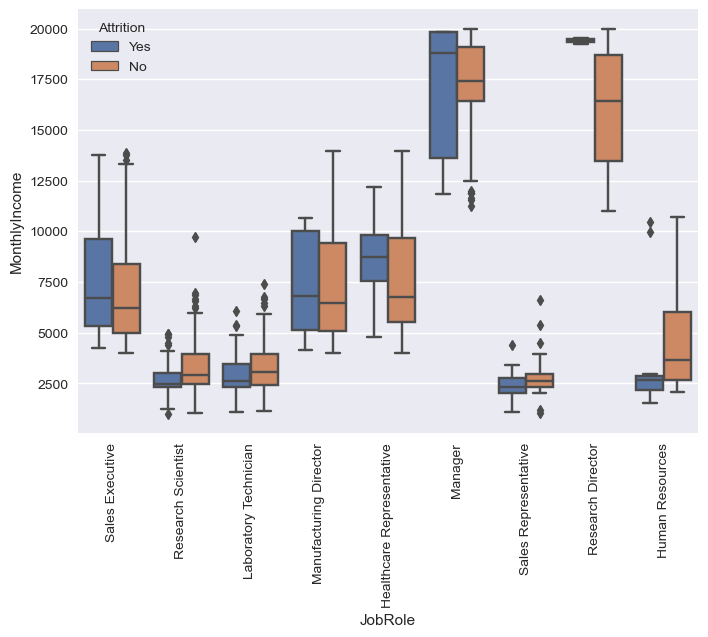

In [101]:
plt.xticks(rotation=90)
ax = sns.boxplot(x="JobRole", y="MonthlyIncome", hue="Attrition", palette='deep', data=df)

- Research Director의 경우 퇴사한 그룹의 분포가 20000 가까이에 매우 모여있으며 퇴사하지 않은 그룹의 월소득은 대체로 그보다 아래에 넓게 퍼져 있음. 이 그룹의 경우 소득이 퇴사 원인이라고 보기는 어려울 것으로 보이며 다른 퇴사 원인이 있을 것으로 생각됨

### 5) JobInvolvement와 MonthlyIncome의 Side-by-side Boxplot

<AxesSubplot:xlabel='JobInvolvement', ylabel='MonthlyIncome'>

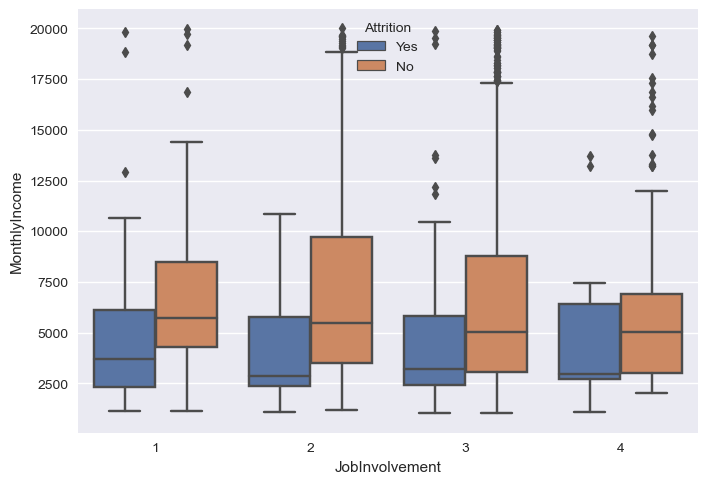

In [67]:
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition", palette='deep', data=df)

- 퇴사한 그룹의 경우 업무 참여도와 관계 없이 분포가 비슷함. 가장 많이 업무의 참여한 사람들의 경우 오히려 중앙값, 최댓값 등을 고려했을 때 업무에 덜 참여한 사람들보다 월 소득이 적거나 같은 것으로 나타남. (업무 참여도가 2, 3인 대부분의 경우에 비해 명수가 적어서 나타난 모습일 수도 있을 것 같다)
- 퇴사하지 않은 그룹의 경우 업무 참여도가 2, 3인 경우의 월 소득 분포가 가장 넓게 퍼져있음. 업무 참여도와 월 소득이 비례하는 것은 아닌 것으로 보임

In [69]:
df.groupby('JobInvolvement')['Attrition'].value_counts()

JobInvolvement  Attrition
1               No            55
                Yes           28
2               No           304
                Yes           71
3               No           743
                Yes          125
4               No           131
                Yes           13
Name: Attrition, dtype: int64

# 3. 수치형 변수 간 상관관계

<AxesSubplot:title={'center':'Correlation of Numerical Features'}>

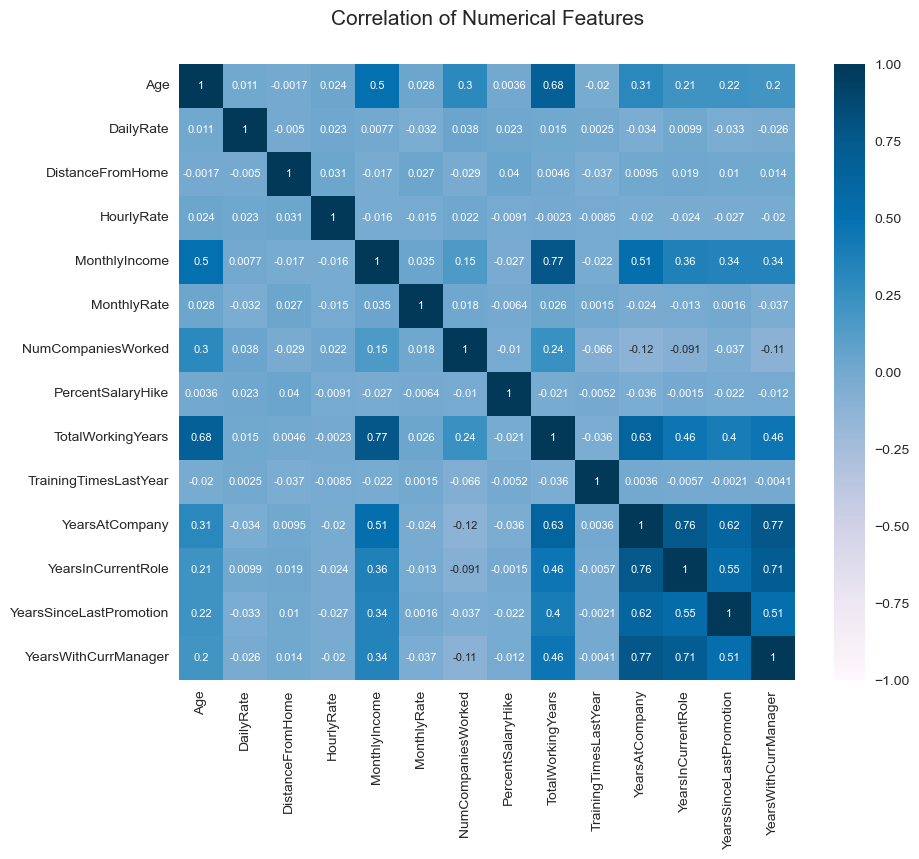

In [112]:
corr=df[discrete_features].drop('StandardHours', axis=1).corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation of Numerical Features", y = 1.05, size = 15)
sns.heatmap(corr, square = True, cmap = plt.cm.PuBu, linecolor = "white", annot = True, annot_kws = {"size" : 8}, vmax=1.0, vmin=-1.0)

<상관관계 0.5 이상 0.7 미만>
- Age, MonthlyIncome
- Age, TotalWorkingYears
- MonthlyIncome, YearsAtCompany
- TotalWorkingYears, YearsAtCompany
- YearsAtCompany, YearsSinceLastPromotion
- YearsInCurrentRole, YearsSinceLastPromotion
- YearsSinceLastPromotion, YearsWithCurrentManager   



<상관관계 절댓값 0.7 이상>
- MonthlyIncome, TotalWorkingYears
- YearsAtCompany, YearsWithCurrentManager
- YearsInCurrentRole, YearsWithCurrentManager


강한 음의 상관관계를 가지는 변수들은 없는 것으로 보임.  
지속 년수와 관련된 변수들 간의 상관관계가 주로 존재함.  
월 소득은 일한 년수(경력으로 해석 가능할 것 같음)나 나이가 많을수록 높은 값을 가짐.

# 4. 파생변수 생성

### 전체적인 만족도 변수

In [132]:
copy = df.copy()
copy['OverallSatisfaction']=(df['EnvironmentSatisfaction']+df['JobSatisfaction']+df['RelationshipSatisfaction']+df['WorkLifeBalance'])
copy['OverallSatisfaction']

0        8
1       12
2       12
3       13
4       10
        ..
1465    13
1466     9
1467     9
1468    12
1469    10
Name: OverallSatisfaction, Length: 1470, dtype: int64

- 모든 항목에서 만족도가 0이라면 만족도 총점은 0, 모든 항목에서 최고로 만족했다면(즉 값이 4) 총점 16

<AxesSubplot:xlabel='OverallSatisfaction', ylabel='Count'>

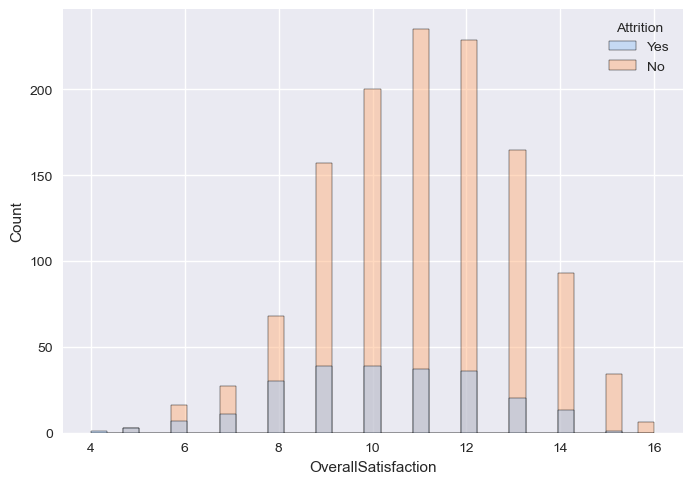

In [137]:
sns.histplot(data=copy, hue='Attrition', palette='pastel', x='OverallSatisfaction')

- 퇴사하지 않은 사람들의 만족도 분포가 퇴사한 사람들의 만족도 분포에 비해 분산이 훨씬 작고 만족도 11을 중심으로 모여있는 것으로 보인다. 약간 left skewed 되어 보임.   
- 퇴사한 사람들의 만족도 분포는 10을 중심으로 넓게 퍼져있다. 

<AxesSubplot:xlabel='OverallSatisfaction', ylabel='Count'>

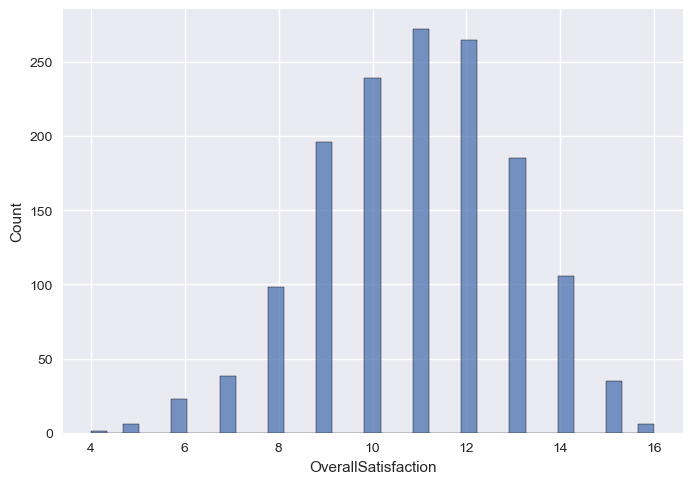

In [138]:
sns.histplot(data=copy, x='OverallSatisfaction')

전체 데이터로 봐도 약간 left skewed 되어있음. 만족도 관련 변수들을 종합해서 봤을 때 보통(점수 8)보다 더 만족하고 근무하는 사람이 많음